D:\anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(12912, 1296)
(12912,)
shape of X train is (10329, 1296)
shape of Y train is (10329,)
Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)
Train on 10329 samples, validate on 2583 samples
Epoch 1/25
10329/10329 [==============================] - 2s 242us/step - loss: 3.9635 - acc: 0.1072 - val_loss: 2.9647 - val_acc: 0.2977
Epoch 2/25
10329/10329 [==============================] - 1s 95us/step - loss: 2.5823 - acc: 0.3416 - val_loss: 1.9946 - val_acc: 0.5168
Epoch 3/25
10329/10329 [==============================] - 1s 92us/step - loss: 2.1015 - acc: 0.4585 - val_loss: 1.8316 - val_acc: 0.5490
Epoch 4/25
10329/10329 [==============================] - 1s 93us/step - loss: 1.8681 - acc: 0.5147 - val_loss: 1.6960 - val_acc: 0.5726
Epoch 5/25
10329/10329 [==============================] - 1s 93us/step - loss: 1.7154 - acc: 0.5531 - val_loss: 1.5146 - val_acc: 0.6125
Epoch 6/25
10329/10329 [==============================] - 1s 95us/step - loss: 1.5876 - acc: 0.

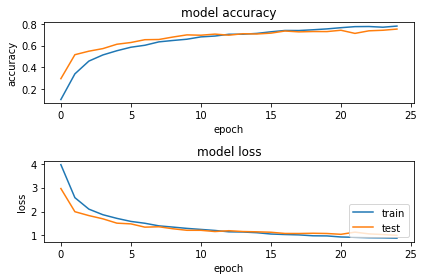

In [19]:
import scipy.misc
import keras
import tensorflow as tf
import glob
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
from keras import regularizers

#must for gpu
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)


# load own handwriting
dataset = []

# load the png image data
os.chdir('D:/')
for image_file_name in glob.glob('ML/nepali_characters/*/*/*.jpg'):
   
    label = int(image_file_name[-14:-11])
    #data=pd.read_csv("/home/pratyush/Documents/labels_num.csv")
    #print(image_file_name[-14:-11])
    
    # load image data from png files into an array
    #print ("loading ... ", image_file_name)
    img_array = scipy.misc.imread(image_file_name, flatten=True)  #Read an image from a file as an array
    
    # reshape from 36x36 to list of 1296 values, invert values
    #img_data  = 255.0 - img_array.reshape(1296)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_array.reshape(1296) / 255)
    #print(numpy.min(img_data))
    #print(numpy.max(img_data))    
    # append label and image data  to test data set
    record = np.append(img_data,label)
    dataset.append(record)

    
#start
data= np.array(dataset)
np.random.shuffle(data)
df=pd.DataFrame(data)
df.to_csv("data.csv")
data_set=pd.read_csv("data.csv")
#print(data_set)

#note: .iloc is necessary while using panda dataframe file

#initailization
X=np.array(data_set.iloc[:,1:1297])
print(X.shape)
Y=np.array(data_set.iloc[:,1297])
b=1
#Y_reshape=Y.reshape(-1,1)
#Y_one= onehotencoder.fit_transform(Y_reshape)
#print(Y_one)
print(Y.shape)

#splitting
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
# normalizing the data to help with the training

W=np.zeros((1296))
W_T=W.T
print("shape of X train is",X_train.shape)
print("shape of Y train is",y_train.shape)
      
# one-hot encoding using keras' numpy-related utilities
n_classes=58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
      
model = Sequential()
model.add(Dense(256, input_shape=(1296,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))

model.add(Dense(58))
model.add(Activation('softmax'))
      
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
      
history1 = model.fit(X_train,Y_train,batch_size=90,epochs=25,verbose=1,validation_data=(X_test, Y_test))

# saving the model
save_dir = "D:\ML"
model_name = 'cnn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig
plt.legend(['train', 'test'], loc='lower right')


In [12]:
print(model.predict_classes(X_test[77:78]))

image =X_test[77]
#print(image.shape)
scipy.misc.imsave("D:\predict2.png",image.reshape(-1,36))
#ram=image.reshape(-1,36)
#print(ram.shape)

[55]
(1296,)
(36, 36)


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


In [8]:
ram=np.array([[1, 2], [3, 4]])
print(ram)

[[1 2]
 [3 4]]


array([[0.01176471, 0.        ],
       [0.03137255, 0.01176471],
       [0.        , 0.        ],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

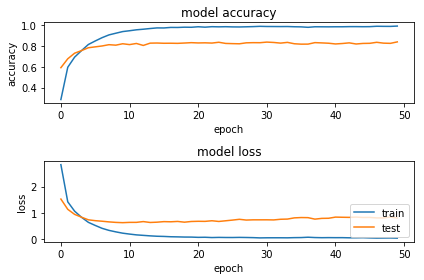

In [14]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig
plt.legend(['train', 'test'], loc='lower right')
